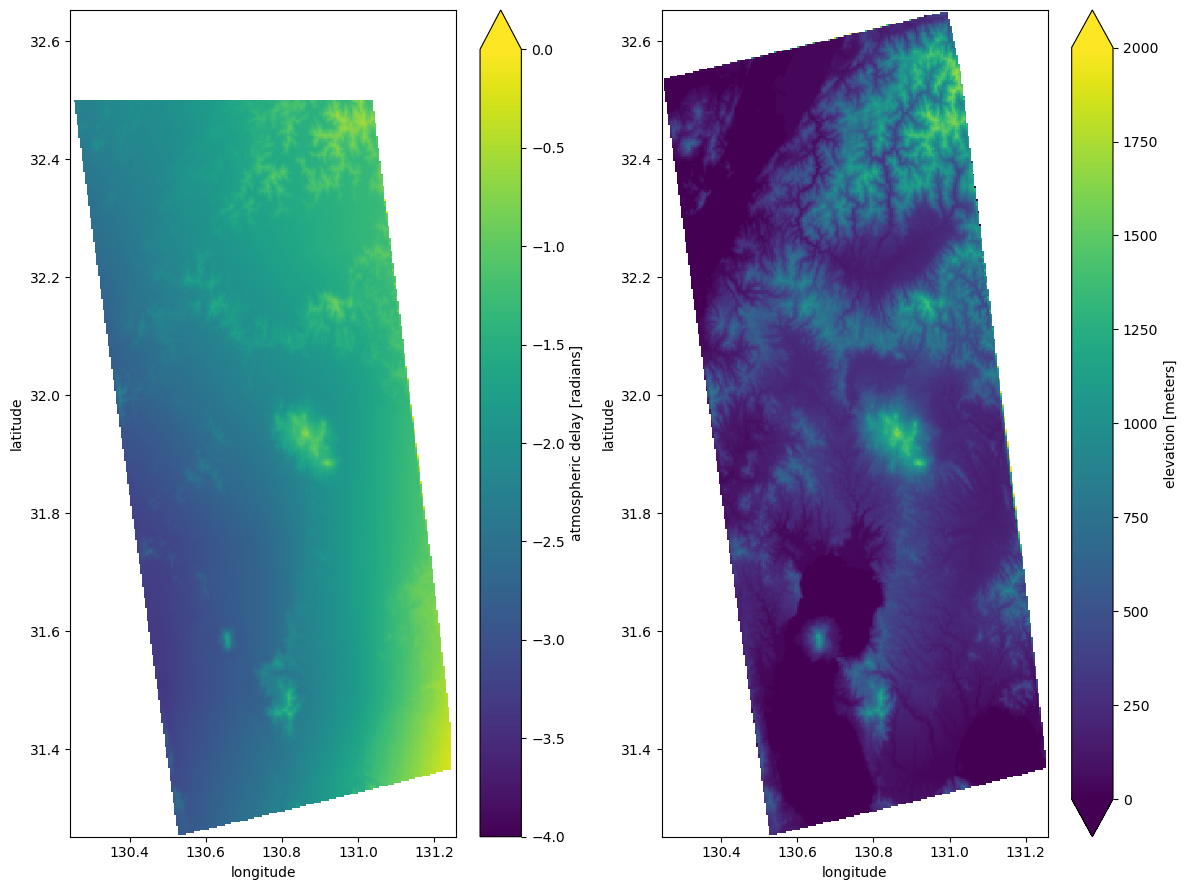

In [5]:
import sys
import xarray as xr
import matplotlib.pyplot as plt

# this relative path assumes you are in the notebooks directory
sys.path.append('..')
from phase_o_matic import presto_phase_delay

# this relative path assumes you are in the notebooks directory
dem = xr.open_dataset('../pyAPS_data/pyaps_geom.nc')['dem']
inc = xr.open_dataset('../pyAPS_data/pyaps_geom.nc')['inc']

work_dir = '../pyAPS_data/example'

t1 = presto_phase_delay(date = '2020-01-03', dem = dem, inc = inc, work_dir = work_dir, wavelength = 0.238403545)
t2 = presto_phase_delay(date = '2020-01-10', dem = dem, inc = inc, work_dir = work_dir, wavelength = 0.238403545)

xr.set_options(keep_attrs = True)
delay_change = t2.isel(time = 0)['delay'] - t1.isel(time = 0)['delay']

fig, axes = plt.subplots(1, 2, figsize = (12, 9))
delay_change.plot(ax = axes[0], vmax = 0, vmin = -4)
dem.plot(ax = axes[1], vmin = 0, vmax = 2000)
plt.tight_layout()
plt.savefig('../images/usage.png')